In [2]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

# Problem 1

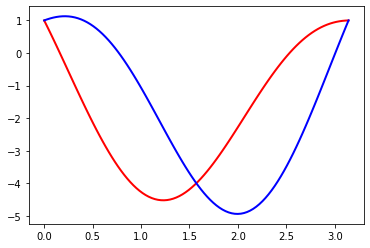

In [12]:
def find_t(f,a,b,alpha,beta,t0,t1,maxI):
    sol1 = 0
    i = 0
    while abs(sol1-beta) > 10**-8 and i < maxI:
        sol0 = odeint(f, np.array([alpha,t0]), [a,b], atol=1e-10)[1,0]
        sol1 = odeint(f, np.array([alpha,t1]), [a,b], atol=1e-10)[1,0]
        t2 = t1 - (sol1 - beta)*(t1-t0)/(sol1-sol0)
        t0 = t1
        t1 = t2
        i = i+1
    if i == maxI:
        print("t not found")
    return t2

def solveSecant(f,X,a,b,alpha,beta,t0,t1,maxI):
    t = find_t(f,a,b,alpha,beta,t0,t1,maxI)
    sol = odeint(f,np.array([alpha,t]), X,atol=1e-10)[:,0]
    return sol

def ode(y,x):
    return np.array([y[1], -4*y[0]-9*np.sin(x)])

X = np.linspace(0,np.pi,100)
# First solution
Y1 = solveSecant(ode,X,0,np.pi,1,1,10,-1,40)

# Second solution
Y2 = solveSecant(ode,X,0,np.pi,1,1,-1,1,40)

# Plot both solutions
plt.plot(X,Y1,'-r',linewidth=2)
plt.plot(X,Y2,'-b',linewidth=2)
plt.show()

### What initial values $t_0$ and $t_1$ did you use to find the solutions?
## 1.9 and 3

# Problem 2

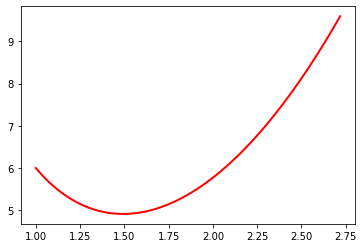

In [21]:
def find_t(f,a,b,alpha,beta,t0,maxI):
    sol = [0]

    i = 0
    while abs(sol[0]-beta) > 10**-8 and i < maxI:

        sol = odeint(f, np.array([alpha,t0,0,1]), [a,b], atol=1e-10)[1]
        y = sol[0]
        z = sol[2]
        t1 =  t0 - (y - beta)/z
        t0 = t1

        i = i+1

    if i == maxI:
        print("t not found")

    return t1

def solveNewton(f,X,a,b,alpha,beta,t0,maxI):

    t = find_t(f,a,b,alpha,beta,t0,maxI)
    sol = odeint(f,np.array([alpha,t,0,1]), X,atol=1e-10)[:,0]

    return sol

def ode(y,x):
    return np.array([y[1], 3+2*y[0]/(x**2), y[3], 2*y[2]/(x**2)])

X = np.linspace(1,np.e,100)

# Solve using newton's method
Y = solveNewton(ode,X,1,np.e,6,np.e**2 + 6/np.e,1,40)

plt.plot(X,Y,'-r',linewidth=2)
plt.show()

### What did you use as your initial guess?

# Problem 3

Theta(0) =  46.8863488558171
Theta(0) =  37.1323410464952


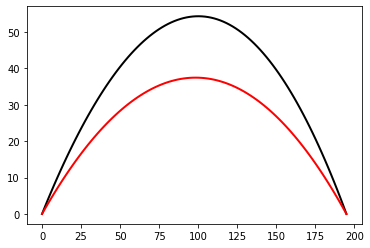

Theta(0) =  35.3976058248104
Theta(0) =  54.60239556353242


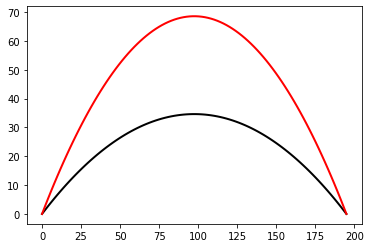

In [71]:
g =  9.8067
mu = 0.0003

def find_t(f,a,b,alpha,beta,t0,t1,maxI):
    sol1 = 1
    i = 0
    while abs(sol1-beta) > 10**-8 and i < maxI:
        sol0 = odeint(f, np.array([0,45,t0]), [a,b], atol=1e-10)[1,0]
        sol1 = odeint(f, np.array([0,45,t1]), [a,b], atol=1e-10)[1,0]
        t2 = t1 - (sol1 - beta)*(t1-t0)/(sol1-sol0)
        t0 = t1
        t1 = t2
        i = i+1
    if i == maxI:
        print("t not found")
    return t2

def solveSecant(f,X,a,b,alpha,beta,t0,t1,maxI):
    t = find_t(f,a,b,alpha,beta,t0,t1,maxI)
    print("Theta(0) = ", np.rad2deg(t))
    sol = odeint(f,np.array([0,45,t]), X,atol=1e-10)[:,0]
    return sol

def ode(y,x):
    return np.array([np.tan(y[2]), -(g*np.sin(y[2]) + mu*y[0]**2) / (y[1] * np.cos(y[2])), -g / y[1]**2])

X = np.linspace(0,195,100)

# Find first solution
Y1 = solveSecant(ode,X,a=0,b=195,alpha=0,beta=0,t0=0.83,t1=-7.5,maxI=40)

# Find second solution
Y2 = solveSecant(ode,X,a=0,b=195,alpha=0,beta=0,t0=0.41,t1=-0.41,maxI=40)

plt.plot(X,Y1,'-k',linewidth=2)
plt.plot(X,Y2,'-r',linewidth=2)
plt.show()

mu = 0
X = np.linspace(0,195,100)

# Find first solution
Y1 = solveSecant(ode,X,a=0,b=195,alpha=0,beta=0,t0=0.83,t1=-7.5,maxI=40)

# Find second solution
Y2 = solveSecant(ode,X,a=0,b=195,alpha=0,beta=0,t0=10,t1=-11,maxI=40)

plt.plot(X,Y1,'-k',linewidth=2)
plt.plot(X,Y2,'-r',linewidth=2)
plt.show()

In [113]:
from math import inf
from itertools import product
 
def floyd_warshall(n, edge):
    rn = range(n)
    dist = [[inf] * n for i in rn]
    nxt  = [[0]   * n for i in rn]
    for i in rn:
        dist[i][i] = 0
    for u, v, w in edge:
        dist[u-1][v-1] = w
        nxt[u-1][v-1] = v-1
    for k, i, j in product(rn, repeat=3):
        sum_ik_kj = dist[i][k] + dist[k][j]
        if dist[i][j] > sum_ik_kj:
            dist[i][j] = sum_ik_kj
            nxt[i][j]  = nxt[i][k]
    print("pair     dist    path")
    for i, j in product(rn, repeat=2):
        if i != j:
            path = [i]
            while path[-1] != j:
                path.append(nxt[path[-1]][j])
            print("%d → %d  %4d       %s" 
                  % (i + 1, j + 1, dist[i][j], 
                     ' → '.join(str(p + 1) for p in path)))
 

In [118]:
D = [[0,1,3],[0,2,5],[0,4,9],[1,0,3],[2,0,5],[2,3,2],[2,4,4],[3,2,2],[3,4,1],[4,0,9],[4,2,4],[4,3,1]]
D = [[x+1,y+1,z] for x,y,z in D]
print(D)
floyd_warshall(5, D)

[[1, 2, 3], [1, 3, 5], [1, 5, 9], [2, 1, 3], [3, 1, 5], [3, 4, 2], [3, 5, 4], [4, 3, 2], [4, 5, 1], [5, 1, 9], [5, 3, 4], [5, 4, 1]]
pair     dist    path
1 → 2     3       1 → 2
1 → 3     5       1 → 3
1 → 4     7       1 → 3 → 4
1 → 5     8       1 → 3 → 4 → 5
2 → 1     3       2 → 1
2 → 3     8       2 → 1 → 3
2 → 4    10       2 → 1 → 3 → 4
2 → 5    11       2 → 1 → 3 → 4 → 5
3 → 1     5       3 → 1
3 → 2     8       3 → 1 → 2
3 → 4     2       3 → 4
3 → 5     3       3 → 4 → 5
4 → 1     7       4 → 3 → 1
4 → 2    10       4 → 3 → 1 → 2
4 → 3     2       4 → 3
4 → 5     1       4 → 5
5 → 1     8       5 → 4 → 3 → 1
5 → 2    11       5 → 4 → 3 → 1 → 2
5 → 3     3       5 → 4 → 3
5 → 4     1       5 → 4


In [121]:
import sys

def MatrixChainOrder(p, i, j): 
  
    if i == j: 
        return 0
  
    _min = sys.maxsize 
      
    # place parenthesis at different places  
    # between first and last matrix,  
    # recursively calculate count of 
    # multiplications for each parenthesis 
    # placement and return the minimum count 
    for k in range(i, j): 
      
        count = (MatrixChainOrder(p, i, k)  
             + MatrixChainOrder(p, k+1, j) 
                   + p[i-1] * p[k] * p[j]) 
  
        if count < _min: 
            _min = count; 
      
  
    # Return minimum count 
    return _min; 

In [123]:
arr = [20, 5, 10, 12, 6]; 
n = len(arr); 
  
print("Minimum number of multiplications is ", 
                MatrixChainOrder(arr, 1, n-1)); 

Minimum number of multiplications is  1560
